In [4]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [5]:
# change makefile to have GPU and OPENCV enabled
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [7]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-15 10:18:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   113KB/s    in 36m 23s 

2020-06-15 10:55:01 (111 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

Mounting drive



In [10]:
%cd ..
from google.colab import drive
drive.mount('/gdrive')

/
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [11]:
#%cd ..
!ln -s /gdrive/My\ Drive/ /mydrive
!ls /mydrive/Maxmoc

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
 car.jpg		   generate_train.py   test.mp4    yolov3
'Copy of detector_v3.py'   obj.zip	       train.jpg   yolov3_tiny
 dance.jpg		   test.jpg	       truck.jpg


In [12]:
%cd /gdrive/
!ls My\ Drive/Maxmoc

/gdrive
 car.jpg		   generate_train.py   test.mp4    yolov3
'Copy of detector_v3.py'   obj.zip	       train.jpg   yolov3_tiny
 dance.jpg		   test.jpg	       truck.jpg


loading and unziping image files with labels

```
# This is formatted as code
```




In [ ]:
#!cp /gdrive/My\ Drive/Maxmoc/obj.zip ../  
#is not able to copy

In [13]:
#checking path
%cd /content/darknet
!ls 

/content/darknet
3rdparty		      darknet		      LICENSE
backup			      DarknetConfig.cmake.in  Makefile
build			      darknet.py	      net_cam_v3.sh
build.ps1		      darknet_video.py	      obj
build.sh		      data		      README.md
cfg			      generate_train.py       results
chart.png		      image_yolov2.sh	      scripts
chart_yolov3_custom_tiny.png  image_yolov3.sh	      src
cmake			      include		      video_v2.sh
CMakeLists.txt		      json_mjpeg_streams.sh   video_yolov3.sh


In [14]:
#checking path
%cd /gdrive/My\ Drive/Maxmoc/
!ls

/gdrive/My Drive/Maxmoc
 car.jpg		   generate_train.py   test.mp4    yolov3
'Copy of detector_v3.py'   obj.zip	       train.jpg   yolov3_tiny
 dance.jpg		   test.jpg	       truck.jpg


In [ ]:
!unzip /gdrive/My\ Drive/Maxmoc/obj.zip -d /content/darknet/data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/darknet/data/obj/f69e273b5cdc8109.txt  
  inflating: /content/darknet/data/obj/c9eba10a5e9c58b0.txt  
  inflating: /content/darknet/data/obj/472a0f2cae1b71a0.jpg  
  inflating: /content/darknet/data/obj/aaaa800cc937d4bf.jpg  
  inflating: /content/darknet/data/obj/b8afb73334125a0a.txt  
  inflating: /content/darknet/data/obj/a25938b696bac5a3.jpg  
  inflating: /content/darknet/data/obj/e2389bfbb663fc99.txt  
  inflating: /content/darknet/data/obj/dcaa7bc5b871f373.jpg  
  inflating: /content/darknet/data/obj/b13a6065f1903bae.txt  
  inflating: /content/darknet/data/obj/92f36bfe8bcd0cbe.jpg  
  inflating: /content/darknet/data/obj/9b4a778c5fc70443.jpg  
  inflating: /content/darknet/data/obj/a5f4a8ded409dad9.txt  
  inflating: /content/darknet/data/obj/30397a0435176788.jpg  
  inflating: /content/darknet/data/obj/53b8edb274e236dd.txt  
  inflating: /content/darknet/data/obj/30d959c674b60f35.txt  
  inflating: /conte

changing conf files

In [ ]:
#download('cfg/yolov3.cfg')

NameError: ignored

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov3-tiny.cfg /mydrive/Maxmoc/yolov3_tiny/yolov3_custom_tiny.cfg

In [ ]:
%cd /content/darknet


/content/darknet


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
#%cd ..
!cp /mydrive/Maxmoc/yolov3_tiny/yolov3_custom_tiny.cfg ./cfg
#%cd darknet
#
#%cd cfg
#upload()
#%cd .. 

Obj.names and obj.data

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Maxmoc/yolov3_tiny/obj.names ./data
!cp /mydrive/Maxmoc/yolov3_tiny/obj.data  ./data


#%cd data
#upload()
#%cd .. 

In [ ]:
!ls /content/darknet/data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     voc.names
coco.names  goal.txt	 labels			   openimages.names
dog.jpg     horses.jpg	 obj			   person.jpg


Generating train

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Maxmoc/generate_train.py ./


#upload()


In [15]:
%ls /content/darknet/data/
%cd /content/darknet/

9k.tree     eagle.jpg    imagenet.labels.list      obj.data          scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names         train.txt
coco.names  goal.txt     labels/                   openimages.names  voc.names
dog.jpg     horses.jpg   obj/                      person.jpg
/content/darknet


In [ ]:
!python generate_train.py

In [ ]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


Pre-trained for convolution layer


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-06-19 14:29:22--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-06-19 14:29:23--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   130KB/s    in 15m 24s 

2020-06-19 14:44:49 (172 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



to train with no interupt
Ctrl+shift+i

function ClickConnect(){
  console.log("Working"); 
  document.querySelector("colab-toolbar-button#connect").click() 
}

setInterval(ClickConnect,60000)

In [ ]:
# train y
!./darknet detector train data/obj.data cfg/yolov3_custom_tiny.cfg darknet53.conv.74 -dont_show

#if no memory change random to 0 in configuration file
#wait for loss under 2

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.526907, GIOU: 0.469891), Class: 0.762152, Obj: 0.001434, No Obj: 0.000216, .5R: 0.500000, .75R: 0.000000, count: 2, class_loss = 0.746120, iou_loss = 0.478992, total_loss = 1.225112 
 total_bbox = 814983, rewritten_bbox = 1.314506 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.874329, GIOU: 0.872573), Class: 0.600289, Obj: 0.207764, No Obj: 0.003681, .5R: 1.000000, .75R: 1.000000, count: 3, class_loss = 1.260146, iou_loss = 0.087115, total_loss = 1.347261 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.332133, GIOU: 0.196149), Class: 0.089696, Obj: 0.002194, No Obj: 0.000367, .5R: 0.500000, .75R: 0.000000, count: 2, class_loss = 1.714922, iou_loss = 0.785238, total_loss = 2.500160 
 total_bbox = 814988, rewritten_bbox = 1.314498 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.734713, GIOU: 

In [ ]:
im.Show('chart.png')

NameError: ignored

In [16]:
!ls /gdrive/My\ Drive/Maxmoc/yolov3_tiny/backup//

yolov3_custom_tiny_100000.weights  yolov3_custom_tiny_50000.weights
yolov3_custom_tiny_10000.weights   yolov3_custom_tiny_5000.weights
yolov3_custom_tiny_1000.weights    yolov3_custom_tiny_51000.weights
yolov3_custom_tiny_101000.weights  yolov3_custom_tiny_52000.weights
yolov3_custom_tiny_102000.weights  yolov3_custom_tiny_53000.weights
yolov3_custom_tiny_103000.weights  yolov3_custom_tiny_54000.weights
yolov3_custom_tiny_104000.weights  yolov3_custom_tiny_55000.weights
yolov3_custom_tiny_105000.weights  yolov3_custom_tiny_56000.weights
yolov3_custom_tiny_106000.weights  yolov3_custom_tiny_57000.weights
yolov3_custom_tiny_107000.weights  yolov3_custom_tiny_58000.weights
yolov3_custom_tiny_108000.weights  yolov3_custom_tiny_59000.weights
yolov3_custom_tiny_109000.weights  yolov3_custom_tiny_60000.weights
yolov3_custom_tiny_110000.weights  yolov3_custom_tiny_6000.weights
yolov3_custom_tiny_11000.weights   yolov3_custom_tiny_61000.weights
yolov3_custom_tiny_111000.weights  yolov3_custom_t

In [ ]:
#if it stops
!./darknet detector train data/obj.data cfg/yolov3_custom_tiny.cfg /gdrive/My\ Drive/Maxmoc/yolov3_tiny/backup/yolov3_custom_tiny_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom_tiny
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 3, batch = 24, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     

In [ ]:
%cd /content/darknet
!cp /gdrive/My\ Drive/Maxmoc/yolov3_tiny/image.c ./src

/content/darknet


testing for images

In [ ]:
# changing custom cfg to test mode 
%cd cfg
!sed -i 's/batch=24/batch=1/' yolov3_custom_tiny.cfg
!sed -i 's/subdivisions=8/subdivisions=1/' yolov3_custom_tiny.cfg
%cd ..

[Errno 2] No such file or directory: 'cfg'
/content
sed: can't read yolov3_custom_tiny.cfg: No such file or directory
sed: can't read yolov3_custom_tiny.cfg: No such file or directory
/


In [ ]:
%cd /content/darknet
!ls

/content/darknet
3rdparty		      DarknetConfig.cmake.in  net_cam_v3.sh
backup			      darknet.py	      obj
build			      darknet_video.py	      predictions.jpg
build.ps1		      data		      README.md
build.sh		      generate_train.py       results
cfg			      image_yolov2.sh	      scripts
chart.png		      image_yolov3.sh	      src
chart_yolov3_custom_tiny.png  include		      video_v2.sh
cmake			      json_mjpeg_streams.sh   video_yolov3.sh
CMakeLists.txt		      LICENSE
darknet			      Makefile


In [ ]:
#!./darknet detect cfg/yolov3_custom.cfg /mydrive/Maxmoc/backup/yolov3_custom_last.weights /mydrive/Maxmoc/test.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom_tiny.cfg /mydrive/Maxmoc/yolov3_tiny/backup/yolov3_custom_tiny_last.weights /mydrive/Maxmoc/car.jpg -thresh 0.3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 2

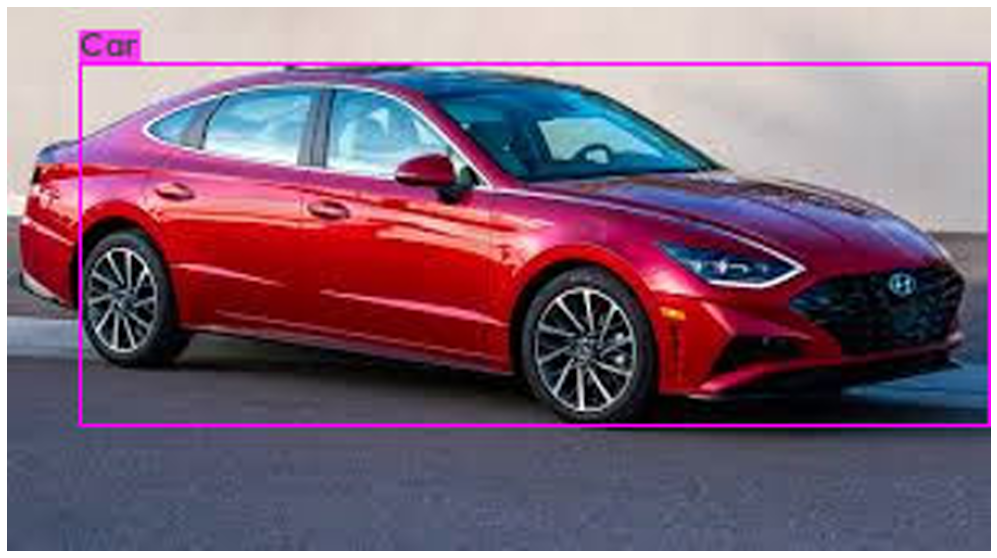

In [ ]:
imShow('predictions.jpg')

/bin/bash: -c: line 0: syntax error near unexpected token `/content/darknet/data/obj/4f8ab00dfa94308c.jpg'
/bin/bash: -c: line 0: `download(/content/darknet/data/obj/4f8ab00dfa94308c.jpg)'
